<a href="https://colab.research.google.com/github/Manasa0109/Machine-Learning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/Student_Marks (1).csv")
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
scaler=MinMaxScaler()
scale=scaler.fit_transform(df[['time_study','Marks']])
df_scale=pd.DataFrame(scale,columns=['time_study','Marks']);
df_scale.head()

,time_study,Marks
0,0.561252,0.273556
1,0.000000,0.042765
2,0.386338,0.165063
3,0.993894,0.954095
4,0.981427,1.000000


In [ ]:
K=range(2,12)
wss=[]
for k in K:
  kmeans=cluster.KMeans(n_clusters=k)
  kmeans=kmeans.fit(df_scale)
  wss_iter=kmeans.inertia_
  wss.append(wss_iter)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

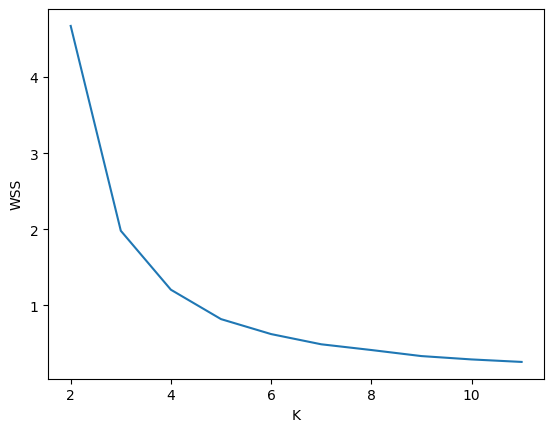

In [ ]:
plt.xlabel("K")
plt.ylabel("WSS")
plt.plot(K,wss)

In [ ]:
km=KMeans(n_clusters=4)
y_predicted=km.fit_predict(df_scale[['time_study','Marks']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 1, 3, 2, 2, 3, 0, 3, 3, 0, 2, 1, 3, 3, 3, 3, 0, 0, 2, 3, 3, 0,
       1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 0, 3, 2, 3, 2, 0, 2, 1, 3, 3, 1,
       1, 1, 3, 3, 0, 3, 0, 3, 1, 0, 2, 3, 2, 2, 0, 2, 1, 1, 3, 3, 1, 1,
       0, 1, 1, 3, 3, 1, 3, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 3, 1, 0, 3, 1,
       1, 0, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0], dtype=int32)

In [ ]:
df['Clusters']=km.labels_

<Axes: xlabel='Marks', ylabel='time_study'>

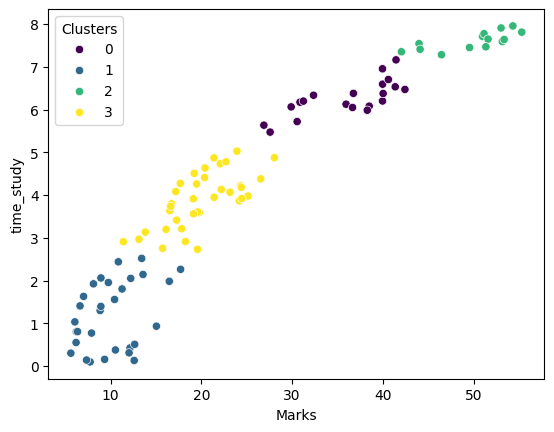

In [ ]:
sns.scatterplot(x="Marks",y="time_study",hue="Clusters",data=df,palette="viridis")